# Analyzing gradients <font color='brown'>"Gradients"</font> in a simple linear regression
# using [TensorFlow](https://www.tensorflow.org/) <font color=magenta> </font>

![Image TensorFlow](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/220px-TensorFlowLogo.svg.png)

### Adapted from: 


* https://www.tensorflow.org/guide/autodiff



<font size=4 color='green'>[MLLB: Machine Learning Lab MLLB (ETSIT-UPM)</font>

# Import TF

---



In [6]:
import tensorflow as tf


---
* # Automatic Differentiation and Gradients
> ## From: https://www.tensorflow.org/guide/autodiff

## Automatic differentiation is useful for implementing machine learning algorithms such as backpropagation for training neural networks.

### In this guide, you will explore ways to compute gradients with TensorFlow, especially in eager execution.



> ## **<font color=red>Automatic differentiation</font>** is useful for implementing machine learning algorithms such as backpropagation for training neural networks. During eager execution, use `tf.GradientTape` to trace operations for computing gradients later.


In [7]:
w = tf.Variable([1.0])
with tf.GradientTape() as tape:
  loss = w * w

grad = tape.gradient(loss, w)
print(grad)  # => tf.Tensor([[ 2.]], shape=(1, 1), dtype=float32)




tf.Tensor([2.], shape=(1,), dtype=float32)




---


### Here's an example of `tf.GradientTape` that records forward-pass operations to train a simple model:

---



In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [9]:
# A toy dataset of y = 3 * x + 2
NUM_EXAMPLES = 1000
training_inputs = tf.random.normal([NUM_EXAMPLES])
noise = tf.random.normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise



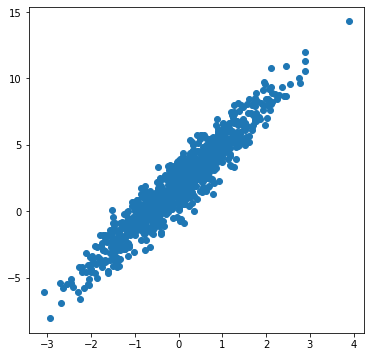

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(training_inputs,training_outputs)

## We can estimate the linear represion slope (w_hat) and intercept (b_hat) using Normal Equations 

![Normal Equations](https://prutor.ai/wp-content/uploads/1-1.png)

[Normal Equation in Linear Regression](https://prutor.ai/normal-equation-in-linear-regression/)

In [11]:
import numpy as np
w_hat=np.cov( training_inputs,training_outputs)[0,1]/np.var(training_inputs)

b_hat=np.mean(training_outputs)-np.mean(training_inputs)*w_hat

print('Estimated w: ',w_hat,' Estimated b: ',b_hat)

Estimated w:  3.016007290067943  Estimated b:  2.0188363648571324


### ... define a prediction function using simple linear regression

In [12]:
def prediction(input, weight, bias):
  return input * weight + bias

### ... define a loss function using mean-squared error for a given (input) value of weights and biases



In [13]:
# A loss function using mean-squared error
def loss(weights, biases):
  error = prediction(training_inputs, weights, biases) - training_outputs
  return tf.reduce_mean(tf.square(error))

In [14]:
loss(2,1)

<tf.Tensor: shape=(), dtype=float32, numpy=2.9623911>

## <font color=orange> Use this loss function to plot loss for a range of weights and biases

In [15]:
Z_loss = [[loss(i,j) for i in tf.range(2, 4, 0.01)] for j in tf.range(1, 3, 0.01)]

In [16]:
import numpy as np

w_range = tf.range(2, 4, 0.01)
b_range = tf.range(1, 3, 0.01)

X, Y = np.meshgrid(w_range, b_range)


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


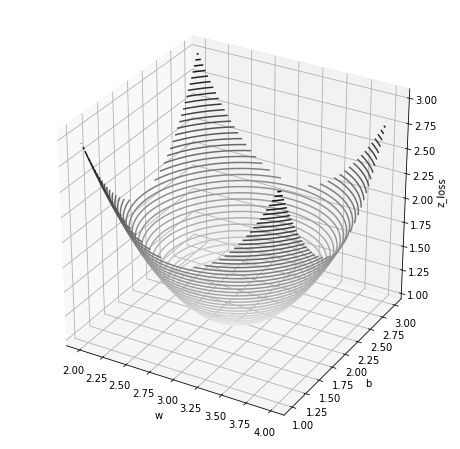

In [17]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_loss, 50, cmap='binary')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('z_loss');


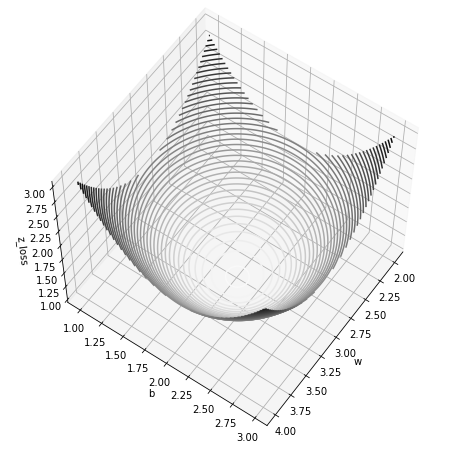

In [18]:
ax.view_init(60, 35)
fig

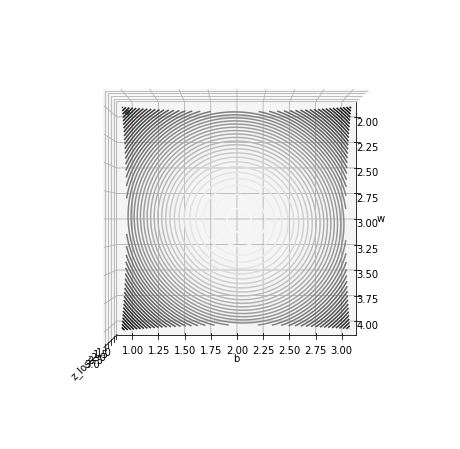

In [19]:
ax.view_init(90, 0)
ax.scatter3D(2.0, 1.0, 2, cmap='Greens');
fig

### ... Return the derivative of loss with respect to weight and bias

In [20]:
# Return the derivative of loss with respect to weight and bias
def grad(weights, biases):
  with tf.GradientTape() as tape:
    loss_value = loss(weights, biases)
  return tape.gradient(loss_value, [weights, biases])


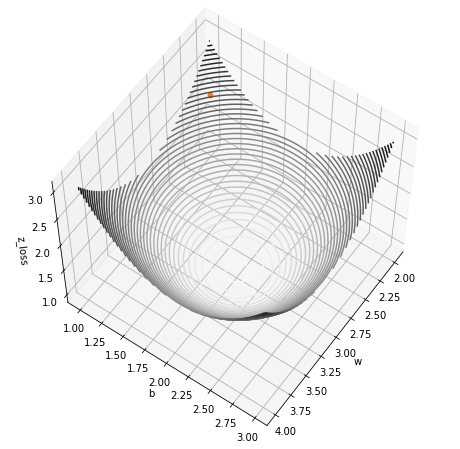

In [21]:
# Start with arbitrary values for W and B on the same batch of data
W = tf.Variable(2.)
B = tf.Variable(1.)

ax.view_init(60, 35)
ax.scatter3D(W.numpy(), B.numpy(), 2, cmap='Greens');
fig


In [22]:
train_steps = 20
learning_rate = 0.01

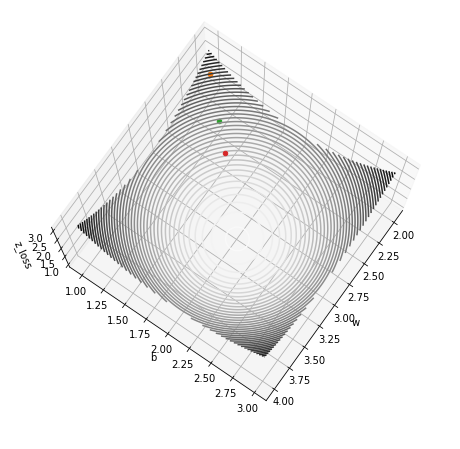

In [24]:
# assign_sub : subtracts the gradientes * learning rate
#
# asssign:sub : Update ref by subtracting value from it.


IniLoss=loss(W, B)
for i in range(train_steps):
  dW, dB = grad(W, B)
  W.assign_sub(dW * learning_rate)
  B.assign_sub(dB * learning_rate)
ax.view_init(80, 35)
ax.scatter3D(W.numpy(), B.numpy(), 2, cmap='Greens');
fig


In [25]:
print("Initial loss: {:.3f}".format(IniLoss))
print("Final loss: {:.3f}".format(loss(W, B)))
print("W = {}, B = {}".format(W.numpy(), B.numpy()))

Initial loss: 1.899
Final loss: 1.408
W = 2.543853282928467, B = 1.5500510931015015


In [26]:
train_steps = 200
learning_rate = 0.01
# Start with arbitrary values for W and B on the same batch of data
W = tf.Variable(5.)
B = tf.Variable(10.)

print("Initial loss: {:.3f}".format(loss(W, B)))

for i in range(train_steps):
  dW, dB = grad(W, B)
  W.assign_sub(dW * learning_rate)
  B.assign_sub(dB * learning_rate)
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss(W, B)))

print("Final loss: {:.3f}".format(loss(W, B)))
print("W = {}, B = {}".format(W.numpy(), B.numpy()))


Initial loss: 67.369
Loss at step 000: 64.786
Loss at step 020: 29.842
Loss at step 040: 14.049
Loss at step 060: 6.905
Loss at step 080: 3.671
Loss at step 100: 2.205
Loss at step 120: 1.540
Loss at step 140: 1.238
Loss at step 160: 1.101
Loss at step 180: 1.039
Final loss: 1.012
W = 3.072312593460083, B = 2.1665492057800293


### ...for more information on gradients and autodiff

https://www.tensorflow.org/guide/autodiff
